# Text Classification Sentiment Analysis

# Get IDMB Movie review data from <a href="http://ai.stanford.edu/~amaas/data/sentiment/">Here</a>


Importing libraries

In [33]:
import pandas as pd
import os
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics  import accuracy_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

converts all  data text file to pandas data frame

In [34]:
folder = 'aclImdb'
labels = {'pos': 1, 'neg': 0}
df = pd.DataFrame()
for f in ('test', 'train'):    
    for l in ('pos', 'neg'):
        path = os.path.join(folder, f, l)
        for file in os.listdir (path) :
            with open(os.path.join(path, file),'r', encoding='utf-8') as infile:
                txt = infile.read()
            df = df.append([[txt, labels[l]]],ignore_index=True)
df.columns = ['review', 'sentiment']

In [35]:
df.head(5)

,review,sentiment
0,"Based on an actual story, John Boorman shows t...",1
1,This is a gem. As a Film Four production - the...,1
2,"I really like this show. It has drama, romance...",1
3,This is the best 3-D experience Disney has at ...,1
4,"Of the Korean movies I've seen, only three had...",1


In [36]:
df.to_csv("movie_data.csv", index=False,encoding="utf-8")

In [37]:
# import nltk
# import ssl

# try:
#     _create_unverified_https_context = ssl._create_unverified_context
# except AttributeError:
#     pass
# else:
#     ssl._create_default_https_context = _create_unverified_https_context

# nltk.download()

In [38]:

reviews = df.review.str.cat(sep=' ')
#function to split text into word
tokens = word_tokenize(reviews)
vocabulary = set(tokens)
print(len(vocabulary))
frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]

198763


['the',
 ',',
 '.',
 'a',
 'and',
 'of',
 'to',
 'is',
 '/',
 '>',
 '<',
 'br',
 'in',
 'I',
 'it',
 'that',
 "'s",
 'this',
 'was',
 'The',
 'as',
 'with',
 'movie',
 'for',
 'film',
 ')',
 '(',
 'but',
 "''",
 "n't",
 '``',
 'on',
 'you',
 'are',
 'not',
 'have',
 'his',
 'be',
 '!',
 'he',
 'one',
 'at',
 'by',
 'an',
 'all',
 'who',
 'they',
 'from',
 'like',
 'It']

Removing stopwords from tokens

In [39]:

stop_words = set(stopwords.words('english'))
tokens = [w for w in tokens if not w in stop_words]

Word map

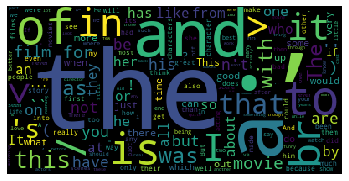

In [47]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.imshow(wordcloud)
# plt.figure(figsize=(100,70))
plt.axis("off")
plt.show()

Train test split

In [41]:
# from sklearn.model_selection import train_test_split
# train_data, test_data = train_test_split(data, test_size=0.1, random_state=5000)

In [42]:
X_train = df.loc[:24999, 'review'].values
y_train = df.loc[:24999, 'sentiment'].values
X_test = df.loc[25000:, 'review'].values
y_test = df.loc[25000:, 'sentiment'].values

TfidfTransformer

In [43]:
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)
print(train_vectors.shape, test_vectors.shape)

(25000, 73822) (25000, 73822)


# Sklearn MultinomialNB Model 

In [44]:
clf = MultinomialNB().fit(train_vectors, y_train)

Accuracy

In [48]:
predicted = clf.predict(test_vectors)
print(accuracy_score(y_test,predicted))

0.83664


Recall, F1 score, Precision in MultinomialNB

In [46]:
print('Accuracy:', accuracy_score(y_test, predicted))
print('F1 score:', f1_score(y_test, predicted))
print('Recall:', recall_score(y_test, predicted))
print('Precision:', precision_score(y_test, predicted))

Accuracy: 0.83664
F1 score: 0.8289925466878821
Recall: 0.79192
Precision: 0.8697065542083993


# SVM

In [50]:
from sklearn.svm import SVC
clf = SVC(gamma='auto').fit(train_vectors, y_train)


In [52]:
predicted = clf.predict(test_vectors)

Recall, F1 score, Precision in SVM

In [53]:
print('Accuracy:', accuracy_score(y_test, predicted))
print('F1 score:', f1_score(y_test, predicted))
print('Recall:', recall_score(y_test, predicted))
print('Precision:', precision_score(y_test, predicted))

Accuracy: 0.6558
F1 score: 0.7385690414704542
Recall: 0.9724
Precision: 0.5953955424932648


# Word Embadading 